#Using our final dataset for one last exploratory analysis before we use it to build our model

This is part 3 of my exploratory analysis for an independent research project. Parts one and two are available in my github repository for this project (linked here).

#Background Information

We have 5 different environmental variables from many different monitoring sites (USDA SNOTEL MONITORING STATIONS).We are trying to model Colorado River Discharge at a gauge by Diamond Creek, AZ (USGS GAUGE No. 09404200). This dataset spans 15 years from 2006-2020. You can find the file of the dataset used below in the same github folder this notebook is in, named as "CRW_Clim_Data_Final.csv"

This notebook was developed in Google Collab by Mya Yazbek on 3/14/2022. It is a sparksnotes version of the Data_Exploration_and_Cleansing_in_10_Easy_Steps.ipynb notebook found within this same github folder. 

#Setting up the environment

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file = "/content/drive/MyDrive/CURRENT Work files/GBI/Research Project/New Report/data/CRW_Clim_Data_Final.csv"

In [ ]:
data = pd.read_csv(file)

In [ ]:
data.head()

,Date,DC_Inflow,Big Sandy Opening (342)\nSnow\nWater\nEquivalent\n(in)\nStart of Month Values,Big Sandy Opening (342)\nPrecipitation\nAccumulation\n(in)\nStart of Month Values,Big Sandy Opening (342)\nAir\nTemperature\nObserved\n(degF)\nStart of Month Values,Big Sandy Opening (342)\nSoil\nTemperature\nObserved -2in\n(degF)\nStart of Month Values,Big Sandy Opening (342)\nSoil\nMoisture\nPercent -2in\n(pct)\nStart of Month Values,Trial Lake (828)\nSnow\nWater\nEquivalent\n(in)\nStart of Month Values,Trial Lake (828)\nPrecipitation\nAccumulation\n(in)\nStart of Month Values,Trial Lake (828)\nAir\nTemperature\nObserved\n(degF)\nStart of Month Values,...,East_Willow_Creek_(461)\nPrecipitation\nAccumulation\n(in)\n,East_Willow_Creek_(461)\nSoil\nTemperature\nObserved_-2in\n(degF)\n,Lasal_Mountain_(572)\nAir\nTemperature\nObserved\n(degF)\n,East_Willow_Creek_(461)\nSnow\nWater\nEquivalent\n(in)\n,East_Willow_Creek_(461)\nSoil\nMoisture\nPercent_-2in\n(pct)\n,BU_380_PA_IN,SLM_762_STO_2IN_DEGF,SLM_762_ATO_DEGF,SLM_762_SWE_IN,BU_380_SMP_2IN_PCT
0,Jan 2006,13970,7.4,8.1,29,31,0.1,15.6,16.0,24,...,2.0,NaN,28.0,0.9,NaN,10.1,52.0,21.0,5.7,19.8
1,Feb 2006,15450,11.3,11.8,14,31,0.1,21.6,21.5,17,...,3.0,22.0,22.0,1.8,7.4,13.1,52.0,10.0,7.9,18.5
2,Mar 2006,11020,13.1,13.2,22,31,0.0,24.7,24.1,19,...,3.3,29.0,33.0,1.8,11.7,14.4,48.0,24.0,9.5,18.5
3,Apr 2006,11100,15.4,15.5,29,32,10.8,30.6,28.4,27,...,6.4,34.0,31.0,4.1,27.4,16.4,41.0,23.0,13.4,27.8
4,May 2006,10630,10.8,16.9,27,35,23.5,33.2,32.0,31,...,6.9,47.0,NaN,0.0,17.2,17.9,35.0,27.0,12.1,21.1


The above code has many incosistencies with column naming conventions. We will have to clean this dataset before use.

#Data Cleaning

In [ ]:
my_list = data.columns.values.tolist()

print(my_list)

['Date', 'DC_Inflow', 'Big Sandy Opening (342)\nSnow\nWater\nEquivalent\n(in)\nStart of Month Values', 'Big Sandy Opening (342)\nPrecipitation\nAccumulation\n(in)\nStart of Month Values', 'Big Sandy Opening (342)\nAir\nTemperature\nObserved\n(degF)\nStart of Month Values', 'Big Sandy Opening (342)\nSoil\nTemperature\nObserved -2in\n(degF)\nStart of Month Values', 'Big Sandy Opening (342)\nSoil\nMoisture\nPercent -2in\n(pct)\nStart of Month Values', 'Trial Lake (828)\nSnow\nWater\nEquivalent\n(in)\nStart of Month Values', 'Trial Lake (828)\nPrecipitation\nAccumulation\n(in)\nStart of Month Values', 'Trial Lake (828)\nAir\nTemperature\nObserved\n(degF)\nStart of Month Values', 'Trial Lake (828)\nSoil\nTemperature\nObserved -2in\n(degF)\nStart of Month Values', 'Trial Lake (828)\nSoil\nMoisture\nPercent -2in\n(pct)\nStart of Month Values', 'Lost Dog (940)\nSnow\nWater\nEquivalent\n(in)\nStart of Month Values', 'Lost Dog (940)\nPrecipitation\nAccumulation\n(in)\nStart of Month Values', 'Lo

The above cell of code will put all of our column names into a list and prints them out.

In [ ]:
data2 = data.copy()

In [ ]:
data2.fillna(method="ffill");

Copying our dataset before use.

In [ ]:
for col in data2.columns:
    data2.rename(columns={col:col.upper().replace(" ","_")},inplace=True) #replaces spaces with _
    data2.rename(columns={col:col.replace("\n", "")}, inplace=True) #removes \n from our column names

In [ ]:
my_list = data2.columns.values.tolist()

print(my_list)

['DATE', 'DC_INFLOW', 'BIG_SANDY_OPENING_(342)SNOWWATEREQUIVALENT(IN)', 'BIG_SANDY_OPENING_(342)PRECIPITATIONACCUMULATION(IN)', 'BIG_SANDY_OPENING_(342)AIRTEMPERATUREOBSERVED(DEGF)', 'BIG_SANDY_OPENING_(342)SOILTEMPERATUREOBSERVED_-2IN(DEGF)', 'BIG_SANDY_OPENING_(342)SOILMOISTUREPERCENT_-2IN(PCT)', 'TRIAL_LAKE_(828)SNOWWATEREQUIVALENT(IN)', 'TRIAL_LAKE_(828)PRECIPITATIONACCUMULATION(IN)', 'TRIAL_LAKE_(828)AIRTEMPERATUREOBSERVED(DEGF)', 'TRIAL_LAKE_(828)SOILTEMPERATUREOBSERVED_-2IN(DEGF)', 'TRIAL_LAKE_(828)SOILMOISTUREPERCENT_-2IN(PCT)', 'LOST_DOG_(940)SNOWWATEREQUIVALENT(IN)', 'LOST_DOG_(940)PRECIPITATIONACCUMULATION(IN)', 'LOST_DOG_(940)AIRTEMPERATUREOBSERVED(DEGF)', 'LOST_DOG_(940)SOILTEMPERATUREOBSERVED_-2IN(DEGF)', 'LOST_DOG_(940)SOILMOISTUREPERCENT_-2IN(PCT)', 'WHITE_RIVER_#1_(864)SNOWWATEREQUIVALENT(IN)', 'WHITE_RIVER_#1_(864)PRECIPITATIONACCUMULATION(IN)', 'WHITE_RIVER_#1_(864)AIRTEMPERATUREOBSERVED(DEGF)', 'WHITE_RIVER_#1_(864)SOILTEMPERATUREOBSERVED_-2IN(DEGF)', 'WHITE_RIVER_#

We are using the .replace() function to rename our column names in the data2 variable. Similar to what we did earlier, we put the new column names in a list and printed it out to make sure the changes were enacted. 

This step will be repeated for each section of the column names you are looking to change. 

In [ ]:
for col in data2.columns:
    data2.rename(columns={col:col.replace("SNOWWATEREQUIVALENT(IN)", "SWE_IN")}, inplace=True)
    data2.rename(columns={col:col.replace("PRECIPITATIONACCUMULATION(IN)", "PA_IN")}, inplace=True)
    data2.rename(columns={col:col.replace("AIRTEMPERATUREOBSERVED(DEGF)", "ATO_DEGF")}, inplace=True)
    data2.rename(columns={col:col.replace("SOILTEMPERATUREOBSERVED_-2IN(DEGF)", "STO_2IN_DEGF")}, inplace=True)
    data2.rename(columns={col:col.replace("SOILMOISTUREPERCENT_-2IN(PCT)", "SMP_2IN_PCT")}, inplace=True)

In [ ]:
print(my_list)

['DATE', 'DC_INFLOW', 'BIG_SANDY_OPENING_(342)SNOWWATEREQUIVALENT(IN)', 'BIG_SANDY_OPENING_(342)PRECIPITATIONACCUMULATION(IN)', 'BIG_SANDY_OPENING_(342)AIRTEMPERATUREOBSERVED(DEGF)', 'BIG_SANDY_OPENING_(342)SOILTEMPERATUREOBSERVED_-2IN(DEGF)', 'BIG_SANDY_OPENING_(342)SOILMOISTUREPERCENT_-2IN(PCT)', 'TRIAL_LAKE_(828)SNOWWATEREQUIVALENT(IN)', 'TRIAL_LAKE_(828)PRECIPITATIONACCUMULATION(IN)', 'TRIAL_LAKE_(828)AIRTEMPERATUREOBSERVED(DEGF)', 'TRIAL_LAKE_(828)SOILTEMPERATUREOBSERVED_-2IN(DEGF)', 'TRIAL_LAKE_(828)SOILMOISTUREPERCENT_-2IN(PCT)', 'LOST_DOG_(940)SNOWWATEREQUIVALENT(IN)', 'LOST_DOG_(940)PRECIPITATIONACCUMULATION(IN)', 'LOST_DOG_(940)AIRTEMPERATUREOBSERVED(DEGF)', 'LOST_DOG_(940)SOILTEMPERATUREOBSERVED_-2IN(DEGF)', 'LOST_DOG_(940)SOILMOISTUREPERCENT_-2IN(PCT)', 'WHITE_RIVER_#1_(864)SNOWWATEREQUIVALENT(IN)', 'WHITE_RIVER_#1_(864)PRECIPITATIONACCUMULATION(IN)', 'WHITE_RIVER_#1_(864)AIRTEMPERATUREOBSERVED(DEGF)', 'WHITE_RIVER_#1_(864)SOILTEMPERATUREOBSERVED_-2IN(DEGF)', 'WHITE_RIVER_#

In [ ]:
for col in data2.columns:    
    data2.rename(columns={col:col.replace("START_OF_MONTH_VALUES", "")}, inplace=True)

In [ ]:
my_list2 = data2.columns.values.tolist()

print(my_list2)

['DATE', 'DC_INFLOW', 'BIG_SANDY_OPENING_(342)SWE_IN', 'BIG_SANDY_OPENING_(342)PA_IN', 'BIG_SANDY_OPENING_(342)ATO_DEGF', 'BIG_SANDY_OPENING_(342)STO_2IN_DEGF', 'BIG_SANDY_OPENING_(342)SMP_2IN_PCT', 'TRIAL_LAKE_(828)SWE_IN', 'TRIAL_LAKE_(828)PA_IN', 'TRIAL_LAKE_(828)ATO_DEGF', 'TRIAL_LAKE_(828)STO_2IN_DEGF', 'TRIAL_LAKE_(828)SMP_2IN_PCT', 'LOST_DOG_(940)SWE_IN', 'LOST_DOG_(940)PA_IN', 'LOST_DOG_(940)ATO_DEGF', 'LOST_DOG_(940)STO_2IN_DEGF', 'LOST_DOG_(940)SMP_2IN_PCT', 'WHITE_RIVER_#1_(864)SWE_IN', 'WHITE_RIVER_#1_(864)PA_IN', 'WHITE_RIVER_#1_(864)ATO_DEGF', 'WHITE_RIVER_#1_(864)STO_2IN_DEGF', 'WHITE_RIVER_#1_(864)SMP_2IN_PCT', 'DONKEY_RESERVOIR_(452)SWE_IN', 'DONKEY_RESERVOIR_(452)PA_IN', 'DONKEY_RESERVOIR_(452)ATO_DEGF', 'DONKEY_RESERVOIR_(452)STO_2IN_DEGF', 'DONKEY_RESERVOIR_(452)SMP_2IN_PCT', 'DILLS_CAMP_(444)SWE_IN', 'DILLS_CAMP_(444)PA_IN', 'DILLS_CAMP_(444)ATO_DEGF', 'DILLS_CAMP_(444)STO_2IN_DEGF', 'DILLS_CAMP_(444)SMP_2IN_PCT', 'HOOSIER_PASS_(531)SWE_IN', 'HOOSIER_PASS_(531)PA_I

In [ ]:
for col in data2.columns:
  data2.rename(columns={col:col.replace(".1", "")}, inplace=True)

In [ ]:
my_list3 = data2.columns.values.tolist()

print(my_list3)

['DATE', 'DC_INFLOW', 'BIG_SANDY_OPENING_(342)SWE_IN', 'BIG_SANDY_OPENING_(342)PA_IN', 'BIG_SANDY_OPENING_(342)ATO_DEGF', 'BIG_SANDY_OPENING_(342)STO_2IN_DEGF', 'BIG_SANDY_OPENING_(342)SMP_2IN_PCT', 'TRIAL_LAKE_(828)SWE_IN', 'TRIAL_LAKE_(828)PA_IN', 'TRIAL_LAKE_(828)ATO_DEGF', 'TRIAL_LAKE_(828)STO_2IN_DEGF', 'TRIAL_LAKE_(828)SMP_2IN_PCT', 'LOST_DOG_(940)SWE_IN', 'LOST_DOG_(940)PA_IN', 'LOST_DOG_(940)ATO_DEGF', 'LOST_DOG_(940)STO_2IN_DEGF', 'LOST_DOG_(940)SMP_2IN_PCT', 'WHITE_RIVER_#1_(864)SWE_IN', 'WHITE_RIVER_#1_(864)PA_IN', 'WHITE_RIVER_#1_(864)ATO_DEGF', 'WHITE_RIVER_#1_(864)STO_2IN_DEGF', 'WHITE_RIVER_#1_(864)SMP_2IN_PCT', 'DONKEY_RESERVOIR_(452)SWE_IN', 'DONKEY_RESERVOIR_(452)PA_IN', 'DONKEY_RESERVOIR_(452)ATO_DEGF', 'DONKEY_RESERVOIR_(452)STO_2IN_DEGF', 'DONKEY_RESERVOIR_(452)SMP_2IN_PCT', 'DILLS_CAMP_(444)SWE_IN', 'DILLS_CAMP_(444)PA_IN', 'DILLS_CAMP_(444)ATO_DEGF', 'DILLS_CAMP_(444)STO_2IN_DEGF', 'DILLS_CAMP_(444)SMP_2IN_PCT', 'HOOSIER_PASS_(531)SWE_IN', 'HOOSIER_PASS_(531)PA_I

In [ ]:
data2.head()

,DATE,DC_INFLOW,BIG_SANDY_OPENING_(342)SWE_IN,BIG_SANDY_OPENING_(342)PA_IN,BIG_SANDY_OPENING_(342)ATO_DEGF,BIG_SANDY_OPENING_(342)STO_2IN_DEGF,BIG_SANDY_OPENING_(342)SMP_2IN_PCT,TRIAL_LAKE_(828)SWE_IN,TRIAL_LAKE_(828)PA_IN,TRIAL_LAKE_(828)ATO_DEGF,...,EAST_WILLOW_CREEK_(461)PA_IN,EAST_WILLOW_CREEK_(461)STO_2IN_DEGF,LASAL_MOUNTAIN_(572)ATO_DEGF,EAST_WILLOW_CREEK_(461)SWE_IN,EAST_WILLOW_CREEK_(461)SMP_2IN_PCT,BU_380_PA_IN,SLM_762_STO_2IN_DEGF,SLM_762_ATO_DEGF,SLM_762_SWE_IN,BU_380_SMP_2IN_PCT
0,Jan 2006,13970,7.4,8.1,29,31,0.1,15.6,16.0,24,...,2.0,NaN,28.0,0.9,NaN,10.1,52.0,21.0,5.7,19.8
1,Feb 2006,15450,11.3,11.8,14,31,0.1,21.6,21.5,17,...,3.0,22.0,22.0,1.8,7.4,13.1,52.0,10.0,7.9,18.5
2,Mar 2006,11020,13.1,13.2,22,31,0.0,24.7,24.1,19,...,3.3,29.0,33.0,1.8,11.7,14.4,48.0,24.0,9.5,18.5
3,Apr 2006,11100,15.4,15.5,29,32,10.8,30.6,28.4,27,...,6.4,34.0,31.0,4.1,27.4,16.4,41.0,23.0,13.4,27.8
4,May 2006,10630,10.8,16.9,27,35,23.5,33.2,32.0,31,...,6.9,47.0,NaN,0.0,17.2,17.9,35.0,27.0,12.1,21.1


#Data Visualization

In [ ]:
print(my_list3)

['DATE', 'DC_INFLOW', 'BIG_SANDY_OPENING_(342)SWE_IN', 'BIG_SANDY_OPENING_(342)PA_IN', 'BIG_SANDY_OPENING_(342)ATO_DEGF', 'BIG_SANDY_OPENING_(342)STO_2IN_DEGF', 'BIG_SANDY_OPENING_(342)SMP_2IN_PCT', 'TRIAL_LAKE_(828)SWE_IN', 'TRIAL_LAKE_(828)PA_IN', 'TRIAL_LAKE_(828)ATO_DEGF', 'TRIAL_LAKE_(828)STO_2IN_DEGF', 'TRIAL_LAKE_(828)SMP_2IN_PCT', 'LOST_DOG_(940)SWE_IN', 'LOST_DOG_(940)PA_IN', 'LOST_DOG_(940)ATO_DEGF', 'LOST_DOG_(940)STO_2IN_DEGF', 'LOST_DOG_(940)SMP_2IN_PCT', 'WHITE_RIVER_#1_(864)SWE_IN', 'WHITE_RIVER_#1_(864)PA_IN', 'WHITE_RIVER_#1_(864)ATO_DEGF', 'WHITE_RIVER_#1_(864)STO_2IN_DEGF', 'WHITE_RIVER_#1_(864)SMP_2IN_PCT', 'DONKEY_RESERVOIR_(452)SWE_IN', 'DONKEY_RESERVOIR_(452)PA_IN', 'DONKEY_RESERVOIR_(452)ATO_DEGF', 'DONKEY_RESERVOIR_(452)STO_2IN_DEGF', 'DONKEY_RESERVOIR_(452)SMP_2IN_PCT', 'DILLS_CAMP_(444)SWE_IN', 'DILLS_CAMP_(444)PA_IN', 'DILLS_CAMP_(444)ATO_DEGF', 'DILLS_CAMP_(444)STO_2IN_DEGF', 'DILLS_CAMP_(444)SMP_2IN_PCT', 'HOOSIER_PASS_(531)SWE_IN', 'HOOSIER_PASS_(531)PA_I

In [ ]:
x = data2['DATE']
y1 = data2["BIG_SANDY_OPENING_(342)SWE_IN"]
y2 = data2["TRIAL_LAKE_(828)SWE_IN"]
y3 = data2["LOST_DOG_(940)SWE_IN"]
y4= data2["WHITE_RIVER_#1_(864)SWE_IN"]
y5 = data2['DONKEY_RESERVOIR_(452)SWE_IN']
y6 = data2['DILLS_CAMP_(444)SWE_IN']
y7 = data2['HOOSIER_PASS_(531)SWE_IN']
y8 = data2['LONE_CONE_(589)SWE_IN']
y9 = data2['WOLF_CREEK_SUMMIT_(874)SWE_IN']
y10 = data2['EAST_WILLOW_CREEK_(461)SWE_IN']
y11 = data2['SLM_762_SWE_IN']

In [ ]:
#x = data2['DATE']
#y1 = data2["BIG_SANDY_OPENING_(342)SWE_IN", "TRIAL_LAKE_(828)SWE_IN", "LOST_DOG_(940)SWE_IN", "WHITE_RIVER_#1_(864)SWE_IN", 'DONKEY_RESERVOIR_(452)SWE_IN', 'DILLS_CAMP_(444)SWE_IN', 'HOOSIER_PASS_(531)SWE_IN', 'LONE_CONE_(589)SWE_IN', 'WOLF_CREEK_SUMMIT_(874)SWE_IN', 'EAST_WILLOW_CREEK_(461)SWE_IN', 'SLM_762_SWE_IN']

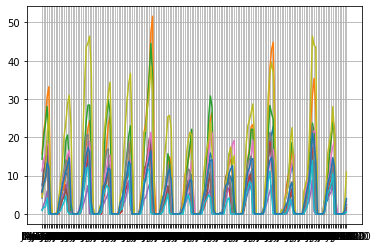

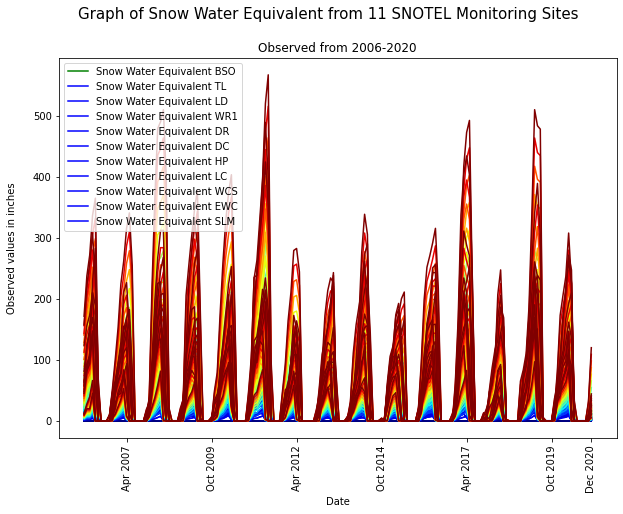

In [ ]:

x = data2["DATE"]
x_axis = x
y_axis = data2[["BIG_SANDY_OPENING_(342)SWE_IN", "TRIAL_LAKE_(828)SWE_IN", "LOST_DOG_(940)SWE_IN", "WHITE_RIVER_#1_(864)SWE_IN", 'DONKEY_RESERVOIR_(452)SWE_IN', 'DILLS_CAMP_(444)SWE_IN', 'HOOSIER_PASS_(531)SWE_IN', 'LONE_CONE_(589)SWE_IN', 'WOLF_CREEK_SUMMIT_(874)SWE_IN', 'EAST_WILLOW_CREEK_(461)SWE_IN', 'SLM_762_SWE_IN']]
plt.plot(x_axis, y_axis)
plt.grid(True)

plt.figure(figsize = (10, 7))

# Plot 1st line
plt.plot(x, y1, 'r', color = 'green', label = "Snow Water Equivalent BSO")

# Plot 2nd line
plt.plot(x, y2, 'r', color = 'blue', label= "Snow Water Equivalent TL")

#and so on to line 11

plt.plot(x, y3, 'r', color = 'blue', label= "Snow Water Equivalent LD")
plt.plot(x, y4, 'r', color = 'blue', label= "Snow Water Equivalent WR1")
plt.plot(x, y5, 'r', color = 'blue', label= "Snow Water Equivalent DR")
plt.plot(x, y6, 'r', color = 'blue', label= "Snow Water Equivalent DC")
plt.plot(x, y7, 'r', color = 'blue', label= "Snow Water Equivalent HP")
plt.plot(x, y8, 'r', color = 'blue', label= "Snow Water Equivalent LC")
plt.plot(x, y9, 'r', color = 'blue', label= "Snow Water Equivalent WCS")
plt.plot(x, y10, 'r', color = 'blue', label= "Snow Water Equivalent EWC")
plt.plot(x, y11, 'r', color = 'blue', label= "Snow Water Equivalent SLM")

n = 12
colors = plt.cm.jet(np.linspace(0,1,n))

for i in range(n):
    plt.plot(x_axis, i*y_axis, color=colors[i])

positions = [15, 45, 75, 105, 135, 165, 179]
pos_list = [0, 2, 4, 6, 8, 10]

#for num in positions:
 # pos_list.append(x_axis.iloc[num])


plt.suptitle("Graph of Snow Water Equivalent from 11 SNOTEL Monitoring Sites", size = 15)
plt.title("Observed from 2006-2020")
plt.xlabel("Date")
plt.ylabel("Observed values in inches\n")
plt.legend()
plt.xticks(ticks = positions, rotation = 'vertical');


Seasonal patterns are quite clear with this dataset. The above graph is horrendous to look at though. Lets explore other data visualization options. 

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f29637ccd90>,
      dtype=object)

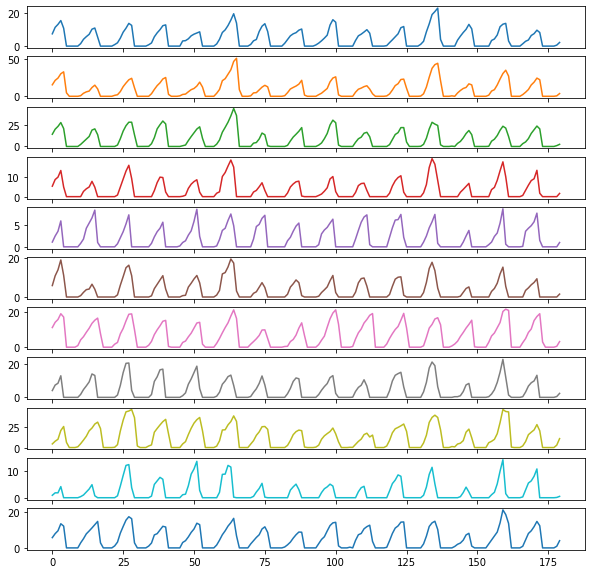

In [ ]:
y2 = data2[["BIG_SANDY_OPENING_(342)SWE_IN", "TRIAL_LAKE_(828)SWE_IN", "LOST_DOG_(940)SWE_IN", "WHITE_RIVER_#1_(864)SWE_IN", 'DONKEY_RESERVOIR_(452)SWE_IN', 'DILLS_CAMP_(444)SWE_IN', 'HOOSIER_PASS_(531)SWE_IN', 'LONE_CONE_(589)SWE_IN', 'WOLF_CREEK_SUMMIT_(874)SWE_IN', 'EAST_WILLOW_CREEK_(461)SWE_IN', 'SLM_762_SWE_IN']]


y2.plot(subplots = True, legend = False, figsize = (10, 10))

Above we have 11 stacked line plots, one for each station's observed Snow Water Equivalent. This is a better visual, but still not the best we can offer. Lets make a correlation heat map!

#Final Correlation

Lets make a correlation heat map for all of the Snow Water Equivalent values for each SNOTEL station. 

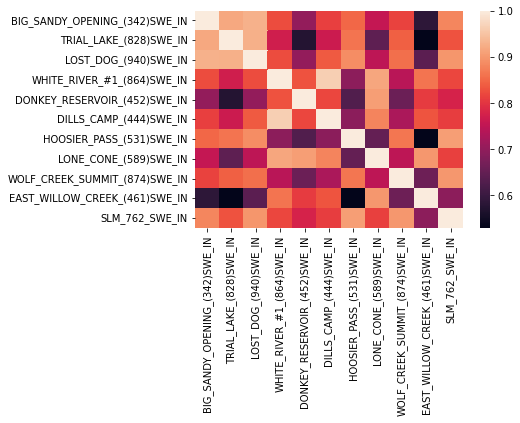

In [ ]:
corr_matrix = y2.corr()

sns.heatmap(corr_matrix)

In [ ]:
corr_matrix3 = corr_matrix["BIG_SANDY_OPENING_(342)SWE_IN"].sort_values(ascending=False) 

Now let's look at a list of correlation coefficients against the Big Sand Opening snow water equivalent. 

In [ ]:
print(corr_matrix3)

BIG_SANDY_OPENING_(342)SWE_IN    1.000000
LOST_DOG_(940)SWE_IN             0.929755
TRIAL_LAKE_(828)SWE_IN           0.917583
SLM_762_SWE_IN                   0.880962
HOOSIER_PASS_(531)SWE_IN         0.849498
WHITE_RIVER_#1_(864)SWE_IN       0.823804
WOLF_CREEK_SUMMIT_(874)SWE_IN    0.814560
DILLS_CAMP_(444)SWE_IN           0.812164
LONE_CONE_(589)SWE_IN            0.755872
DONKEY_RESERVOIR_(452)SWE_IN     0.703381
EAST_WILLOW_CREEK_(461)SWE_IN    0.584314
Name: BIG_SANDY_OPENING_(342)SWE_IN, dtype: float64


In [ ]:
big_corr = data2.corr()

In [ ]:
big_list = big_corr["DC_INFLOW"].sort_values(ascending=False)

print(big_list)

DC_INFLOW                              1.000000
DILLS_CAMP_(444)PA_IN                  0.347859
WHITE_RIVER_#1_(864)PA_IN              0.347102
EAST_WILLOW_CREEK_(461)PA_IN           0.346120
TRIAL_LAKE_(828)PA_IN                  0.341571
LOST_DOG_(940)PA_IN                    0.312928
DONKEY_RESERVOIR_(452)PA_IN            0.310204
BIG_SANDY_OPENING_(342)PA_IN           0.288507
HOOSIER_PASS_(531)STO_2IN_DEGF         0.273854
TRIAL_LAKE_(828)STO_2IN_DEGF           0.273271
BU_380_PA_IN                           0.256479
BIG_SANDY_OPENING_(342)STO_2IN_DEGF    0.247271
WOLF_CREEK_SUMMIT_(874)PA_IN           0.239415
SLM_762_STO_2IN_DEGF                   0.227456
LONE_CONE_(589)STO_2IN_DEGF            0.226975
HOOSIER_PASS_(531)PA_IN                0.216483
DONKEY_RESERVOIR_(452)STO_2IN_DEGF     0.208985
EAST_WILLOW_CREEK_(461)STO_2IN_DEGF    0.201842
LONE_CONE_(589)PA_IN                   0.201100
DILLS_CAMP_(444)STO_2IN_DEGF           0.190856
WHITE_RIVER_#1_(864)STO_2IN_DEGF       0

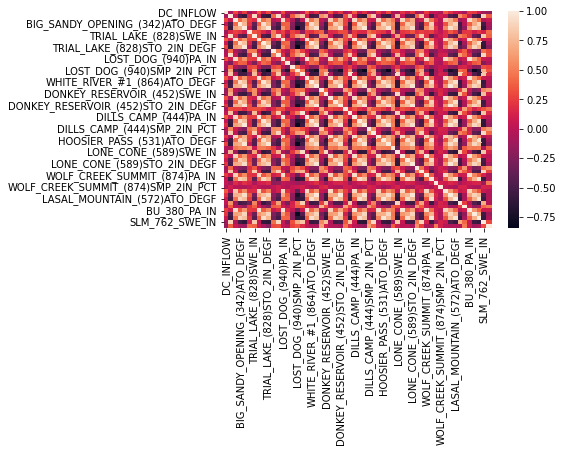

In [ ]:
sns.heatmap(big_corr)

The above correlation matrix does not look normalized. This is because we have redundant attributes (indicated by the light squares that are NOT the diagonal middle line). We must remove these before we use this data for our final model. Lets look at our data header one more time, and then write a block of code that will automatically remove any attributes with a correlation higher than .95

In [ ]:
data2.head()

,DATE,DC_INFLOW,BIG_SANDY_OPENING_(342)SWE_IN,BIG_SANDY_OPENING_(342)PA_IN,BIG_SANDY_OPENING_(342)ATO_DEGF,BIG_SANDY_OPENING_(342)STO_2IN_DEGF,BIG_SANDY_OPENING_(342)SMP_2IN_PCT,TRIAL_LAKE_(828)SWE_IN,TRIAL_LAKE_(828)PA_IN,TRIAL_LAKE_(828)ATO_DEGF,...,EAST_WILLOW_CREEK_(461)PA_IN,EAST_WILLOW_CREEK_(461)STO_2IN_DEGF,LASAL_MOUNTAIN_(572)ATO_DEGF,EAST_WILLOW_CREEK_(461)SWE_IN,EAST_WILLOW_CREEK_(461)SMP_2IN_PCT,BU_380_PA_IN,SLM_762_STO_2IN_DEGF,SLM_762_ATO_DEGF,SLM_762_SWE_IN,BU_380_SMP_2IN_PCT
0,Jan 2006,13970,7.4,8.1,29,31,0.1,15.6,16.0,24,...,2.0,NaN,28.0,0.9,NaN,10.1,52.0,21.0,5.7,19.8
1,Feb 2006,15450,11.3,11.8,14,31,0.1,21.6,21.5,17,...,3.0,22.0,22.0,1.8,7.4,13.1,52.0,10.0,7.9,18.5
2,Mar 2006,11020,13.1,13.2,22,31,0.0,24.7,24.1,19,...,3.3,29.0,33.0,1.8,11.7,14.4,48.0,24.0,9.5,18.5
3,Apr 2006,11100,15.4,15.5,29,32,10.8,30.6,28.4,27,...,6.4,34.0,31.0,4.1,27.4,16.4,41.0,23.0,13.4,27.8
4,May 2006,10630,10.8,16.9,27,35,23.5,33.2,32.0,31,...,6.9,47.0,NaN,0.0,17.2,17.9,35.0,27.0,12.1,21.1


In [ ]:
df = data2

Dropping highly correlated values (> 0.95)

In [ ]:
# Create correlation matrix
corr_matrix = df.corr().abs()

# Select upper triangle of correlation matrix, without the middle diagonal as including this would remove ALL of our attributes
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.9500000)]
# Drop features 
df2 = df.drop(df[to_drop], axis=1)

df2.head()

,DATE,DC_INFLOW,BIG_SANDY_OPENING_(342)SWE_IN,BIG_SANDY_OPENING_(342)PA_IN,BIG_SANDY_OPENING_(342)ATO_DEGF,BIG_SANDY_OPENING_(342)STO_2IN_DEGF,BIG_SANDY_OPENING_(342)SMP_2IN_PCT,TRIAL_LAKE_(828)SWE_IN,TRIAL_LAKE_(828)ATO_DEGF,TRIAL_LAKE_(828)SMP_2IN_PCT,...,WOLF_CREEK_SUMMIT_(874)SWE_IN,WOLF_CREEK_SUMMIT_(874)ATO_DEGF,WOLF_CREEK_SUMMIT_(874)STO_2IN_DEGF,WOLF_CREEK_SUMMIT_(874)SMP_2IN_PCT,EAST_WILLOW_CREEK_(461)PA_IN,EAST_WILLOW_CREEK_(461)SWE_IN,EAST_WILLOW_CREEK_(461)SMP_2IN_PCT,SLM_762_STO_2IN_DEGF,SLM_762_SWE_IN,BU_380_SMP_2IN_PCT
0,Jan 2006,13970,7.4,8.1,29,31,0.1,15.6,24,28.1,...,4.4,24.0,32.0,21.9,2.0,0.9,NaN,52.0,5.7,19.8
1,Feb 2006,15450,11.3,11.8,14,31,0.1,21.6,17,27.7,...,7.7,20.0,32.0,19.2,3.0,1.8,7.4,52.0,7.9,18.5
2,Mar 2006,11020,13.1,13.2,22,31,0.0,24.7,19,27.7,...,10.1,33.0,32.0,16.2,3.3,1.8,11.7,48.0,9.5,18.5
3,Apr 2006,11100,15.4,15.5,29,32,10.8,30.6,27,28.6,...,20.8,31.0,32.0,22.7,6.4,4.1,27.4,41.0,13.4,27.8
4,May 2006,10630,10.8,16.9,27,35,23.5,33.2,31,29.7,...,25.7,36.0,32.0,32.2,6.9,0.0,17.2,35.0,12.1,21.1


We know that our code worked because instead of 57 columns, there are now only 39. Let's see what our correlation heat map looks like now.

In [ ]:
df_cor = df2.corr()

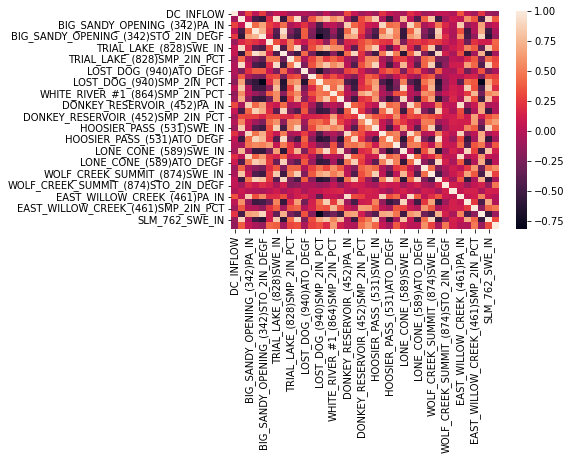

In [ ]:
sns.heatmap(df_cor)

This looks a lot better than our previous correlation heat map. Now lets see how our attributes compare to our response variable (Diamond Creek Inflow)

In [ ]:
beep_boop = df_cor["DC_INFLOW"].sort_values(ascending = False)

In [ ]:
print(beep_boop)

DC_INFLOW                              1.000000
EAST_WILLOW_CREEK_(461)PA_IN           0.346120
DONKEY_RESERVOIR_(452)PA_IN            0.310204
BIG_SANDY_OPENING_(342)PA_IN           0.288507
BIG_SANDY_OPENING_(342)STO_2IN_DEGF    0.247271
SLM_762_STO_2IN_DEGF                   0.227456
HOOSIER_PASS_(531)PA_IN                0.216483
LONE_CONE_(589)PA_IN                   0.201100
LONE_CONE_(589)ATO_DEGF                0.090019
TRIAL_LAKE_(828)ATO_DEGF               0.067605
DONKEY_RESERVOIR_(452)ATO_DEGF         0.063161
HOOSIER_PASS_(531)ATO_DEGF             0.054474
TRIAL_LAKE_(828)SWE_IN                 0.049726
WOLF_CREEK_SUMMIT_(874)ATO_DEGF        0.047602
WOLF_CREEK_SUMMIT_(874)STO_2IN_DEGF    0.047422
EAST_WILLOW_CREEK_(461)SWE_IN          0.031455
BIG_SANDY_OPENING_(342)ATO_DEGF        0.027779
WHITE_RIVER_#1_(864)SWE_IN             0.022092
DILLS_CAMP_(444)SMP_2IN_PCT           -0.015057
HOOSIER_PASS_(531)SMP_2IN_PCT         -0.019470
LOST_DOG_(940)ATO_DEGF                -0

The highest correlated value would be the Precipitation in inches at the East Willow Creek USDA SNOTEL Monitoring Station. This all looks good! Now we can export our final dataset to use for our model. 

#Exporting our final dataset 

In [ ]:
data_for_model = df2

In [ ]:
data_for_model.head()

,DATE,DC_INFLOW,BIG_SANDY_OPENING_(342)SWE_IN,BIG_SANDY_OPENING_(342)PA_IN,BIG_SANDY_OPENING_(342)ATO_DEGF,BIG_SANDY_OPENING_(342)STO_2IN_DEGF,BIG_SANDY_OPENING_(342)SMP_2IN_PCT,TRIAL_LAKE_(828)SWE_IN,TRIAL_LAKE_(828)ATO_DEGF,TRIAL_LAKE_(828)SMP_2IN_PCT,...,WOLF_CREEK_SUMMIT_(874)SWE_IN,WOLF_CREEK_SUMMIT_(874)ATO_DEGF,WOLF_CREEK_SUMMIT_(874)STO_2IN_DEGF,WOLF_CREEK_SUMMIT_(874)SMP_2IN_PCT,EAST_WILLOW_CREEK_(461)PA_IN,EAST_WILLOW_CREEK_(461)SWE_IN,EAST_WILLOW_CREEK_(461)SMP_2IN_PCT,SLM_762_STO_2IN_DEGF,SLM_762_SWE_IN,BU_380_SMP_2IN_PCT
0,Jan 2006,13970,7.4,8.1,29,31,0.1,15.6,24,28.1,...,4.4,24.0,32.0,21.9,2.0,0.9,NaN,52.0,5.7,19.8
1,Feb 2006,15450,11.3,11.8,14,31,0.1,21.6,17,27.7,...,7.7,20.0,32.0,19.2,3.0,1.8,7.4,52.0,7.9,18.5
2,Mar 2006,11020,13.1,13.2,22,31,0.0,24.7,19,27.7,...,10.1,33.0,32.0,16.2,3.3,1.8,11.7,48.0,9.5,18.5
3,Apr 2006,11100,15.4,15.5,29,32,10.8,30.6,27,28.6,...,20.8,31.0,32.0,22.7,6.4,4.1,27.4,41.0,13.4,27.8
4,May 2006,10630,10.8,16.9,27,35,23.5,33.2,31,29.7,...,25.7,36.0,32.0,32.2,6.9,0.0,17.2,35.0,12.1,21.1


Our dataframe looks good! Let's export this bad boy into a csv. 

The below code will save our final dataset as a csv in my google drive in whichever folder I specify. 

In [ ]:
data_for_model.to_csv('data_for_model.csv')
!cp data_for_model.csv "/content/drive/MyDrive/CURRENT Work files/GBI/Research Project/New Report/Model_Building"

This concludes our FINAL exploratory analysis for this dataset. We will now begin building our model! How exciting!